## Import Packages

In [47]:
import os

import fiona
import geopandas as gpd
import numpy as np
import pandas as pd
import rasterio as rio
import xarray as xr
from shapely.geometry import Point

## Define Variables

In [111]:
folderpath = '../data/raw/'
filename = 'cdl_apples_easternmountain.TIF'
filepath = os.path.join(folderpath, filename)

## Define Functions

In [63]:
def load_cdl(filepath):
    """
    Load a raster file, create points from valid pixel values, and convert to a GeoDataFrame in EPSG:4326.
    
    Args:
        filepath (str): The file path to the raster file.
        
    Returns:
        GeoDataFrame: A GeoDataFrame containing point geometries for valid pixel values, 
                      with coordinates in EPSG:4326.
    """
    with rio.open(filepath) as src:
        # Read the first band with masking
        image = src.read(1, masked=True)

        # Get row, column indices for valid pixel values
        rows, cols = np.where(image < 255)

        # Create point geometries using affine transformation
        transform = src.transform
        geoms = [Point(transform * (col, row)) for row, col in zip(rows, cols)]

        # Create GeoDataFrame with the specified CRS
        gdf = gpd.GeoDataFrame(geometry=geoms, crs=src.crs)

    # Return GeoDataFrame in EPSG:4326
    return gdf.to_crs('EPSG:4326')

In [64]:
def save_gdf(folderpath, filename, geodataframe):
    """
    Saves a GeoDataFrame to a file in a specified directory.

    Parameters:
    - folderpath: The directory where the file will be saved.
    - filename: The name of the file to save the GeoDataFrame as.
    - geodataframe: The GeoDataFrame to be saved.

    The function saves the GeoDataFrame in the specified filepath and filename,
    with the coordinate reference system set to 'EPSG:4326' for geographical coordinates (latitude and longitude).
    """
    # Combine the filepath and filename to create the full path to the file
    full_path = os.path.join(folderpath, filename)
    
    # Save the GeoDataFrame to the specified file in write mode ('w') and with the specified CRS
    geodataframe.to_file(full_path, mode='w', crs='EPSG:4326')

## Execute Functions

In [112]:
# Load a GeoTIFF file from CroplandCROS as a GeoDataFrame
gdf = load_cdl(filepath)

In [113]:
# Save the GeoDataFrame
save_gdf('../data/interim', filename.split('.')[0], gdf)

<Axes: >

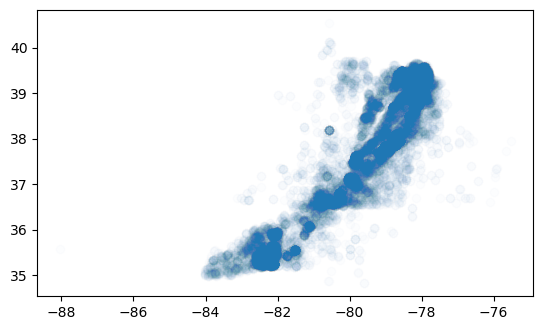

In [114]:
# Plot the GeoDataFrame to visualize potential polygons
gdf.plot(alpha=0.01)

In [117]:
# Combine East Coast GeoTIFF files from CroplandCROS
gdf = pd.concat([load_cdl('../data/raw/cdl_apples_northeastern.TIF'),
                 load_cdl('../data/raw/cdl_apples_easternmountain.TIF'),
                 load_cdl('../data/raw/cdl_apples_southern.TIF')], 
                 ignore_index=True)

In [118]:
# Save the East Coast GeoDataFrame
save_gdf('../data/interim', 'cdl_apples_eastcoast', gdf)

<Axes: >

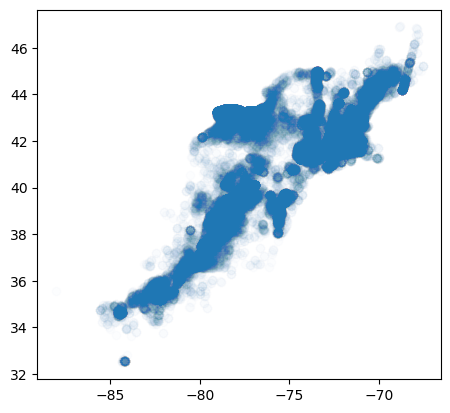

In [119]:
# Plot the GeoDataFrame to visualize potential polygons
gdf.plot(alpha=0.01)